<a href="https://colab.research.google.com/github/JNK234/Fast.ai-Projects/blob/master/DataBlocks/DataBlock_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install fastai --upgrade

## Understanding DataBlocks

In [2]:
from fastai.vision.all import *

In [3]:
path = untar_data(URLs.PETS)

In [4]:
path

Path('/root/.fastai/data/oxford-iiit-pet')

In [8]:
# !ls $path/'images'

In [9]:
files = get_image_files(path/'images')

In [35]:
RandomSplitter()(files)

((#5912) [6056,3911,6950,7067,5806,5222,212,6148,5456,3049...],
 (#1478) [2976,2727,5779,7194,816,1809,4459,2865,6060,49...])

In [41]:
dblock = DataBlock(
    blocks = (ImageBlock, CategoryBlock),
    get_items = get_image_files,
    get_y = lambda x: x.name[0].isupper(),
    splitter = RandomSplitter(valid_pct=0.2, seed=42),
    item_tfms = Resize(224) 
)

In [42]:
dsets = dblock.datasets(path)

In [43]:
dsets[0]

(PILImage mode=RGB size=600x434, TensorCategory(1))

In [58]:
dls = dblock.dataloaders(path)

In [59]:
xb, yb = dls.one_batch()

In [60]:
xb.shape, yb.shape

(torch.Size([64, 3, 224, 224]), torch.Size([64]))

In [44]:
dblock.summary(path)

Setting-up type transforms pipelines
Found 14780 items
2 datasets of sizes 11824,2956
Setting up Pipeline: PILBase.create
Setting up Pipeline: <lambda> -> Categorize -- {'vocab': None, 'sort': True, 'add_na': False}

Building one sample
  Pipeline: PILBase.create
    starting from
      /root/.fastai/data/oxford-iiit-pet/annotations/trimaps/shiba_inu_75.png
    applying PILBase.create gives
      PILImage mode=RGB size=375x500
  Pipeline: <lambda> -> Categorize -- {'vocab': None, 'sort': True, 'add_na': False}
    starting from
      /root/.fastai/data/oxford-iiit-pet/annotations/trimaps/shiba_inu_75.png
    applying <lambda> gives
      False
    applying Categorize -- {'vocab': None, 'sort': True, 'add_na': False} gives
      TensorCategory(0)

Final sample: (PILImage mode=RGB size=375x500, TensorCategory(0))


Found 14780 items
2 datasets of sizes 11824,2956
Setting up Pipeline: PILBase.create
Setting up Pipeline: <lambda> -> Categorize -- {'vocab': None, 'sort': True, 'add_na': Fal

In [45]:
??ImageBlock

In [46]:
TransformBlock??

In [48]:
imb = ImageBlock()

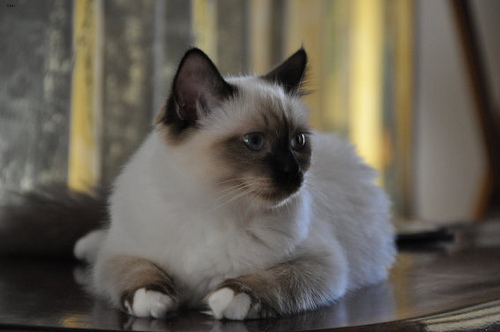

In [51]:
imb.type_tfms[0](files[0])

Therefore ImageBlock takes file path as input and returns PILImage as output

In [54]:
imb.batch_tfms[0](files[0])

IntToFloatTensor -- {'div': Path('/root/.fastai/data/oxford-iiit-pet/images/Birman_131.jpg'), 'div_mask': 1}:
encodes: (TensorImage,object) -> encodes
(TensorMask,object) -> encodes
decodes: (TensorImage,object) -> decodes

In [55]:
??CategoryBlock

In [39]:
dsets.train

(#11824) [(PILImage mode=RGB size=375x500, TensorCategory(0)),(PILImage mode=RGB size=500x328, TensorCategory(0)),(PILImage mode=RGB size=500x333, TensorCategory(0)),(PILImage mode=RGB size=180x250, TensorCategory(1)),(PILImage mode=RGB size=500x339, TensorCategory(1)),(PILImage mode=RGB size=375x500, TensorCategory(0)),(PILImage mode=RGB size=500x334, TensorCategory(0)),(PILImage mode=RGB size=519x287, TensorCategory(1)),(PILImage mode=RGB size=500x333, TensorCategory(0)),(PILImage mode=RGB size=500x375, TensorCategory(1))...]

In [40]:
dsets.valid

(#2956) [(PILImage mode=RGB size=500x375, TensorCategory(1)),(PILImage mode=RGB size=362x500, TensorCategory(1)),(PILImage mode=RGB size=500x333, TensorCategory(0)),(PILImage mode=RGB size=500x375, TensorCategory(0)),(PILImage mode=RGB size=500x334, TensorCategory(0)),(PILImage mode=RGB size=500x333, TensorCategory(0)),(PILImage mode=RGB size=500x246, TensorCategory(1)),(PILImage mode=RGB size=500x411, TensorCategory(1)),(PILImage mode=RGB size=337x500, TensorCategory(0)),(PILImage mode=RGB size=333x500, TensorCategory(1))...]